In [1]:
import pandas as pd

df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_india = df[df['Country'] == 'India']
df_india.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
243695,1796-01-01,17.044,2.044,India
243696,1796-02-01,19.193,1.359,India
243697,1796-03-01,22.319,2.125,India
243698,1796-04-01,27.233,1.510,India
243699,1796-05-01,30.035,1.338,India


In [2]:
df_india['dt'] = pd.to_datetime(df_india['dt'])
df_india = df_india.set_index('dt')

C:\Users\omarm\AppData\Local\Temp\ipykernel_5452\1620641373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['dt'] = pd.to_datetime(df_india['dt'])


In [3]:
print(df_india.isnull().sum())
df_india['AverageTemperature'].interpolate(method='time', inplace=True)

AverageTemperature               105
AverageTemperatureUncertainty    105
Country                            0
dtype: int64


In [4]:
df_india_yearly = df_india['AverageTemperature'].resample('A').mean()

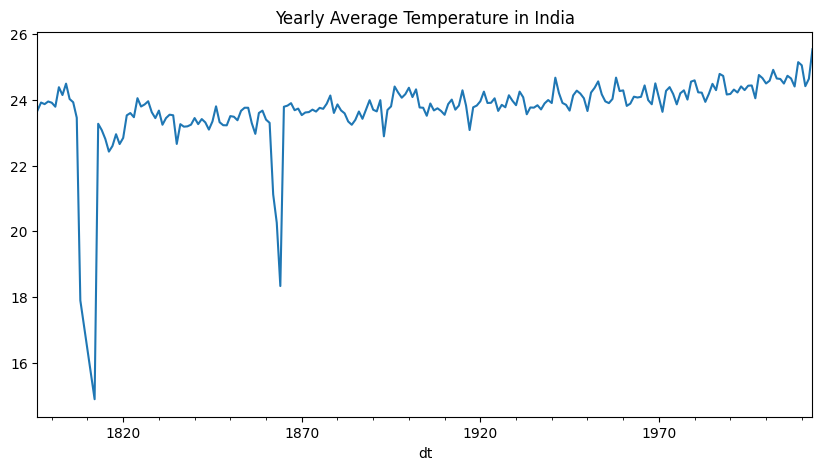

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
df_india_yearly.plot()
plt.title('Yearly Average Temperature in India')
plt.show()

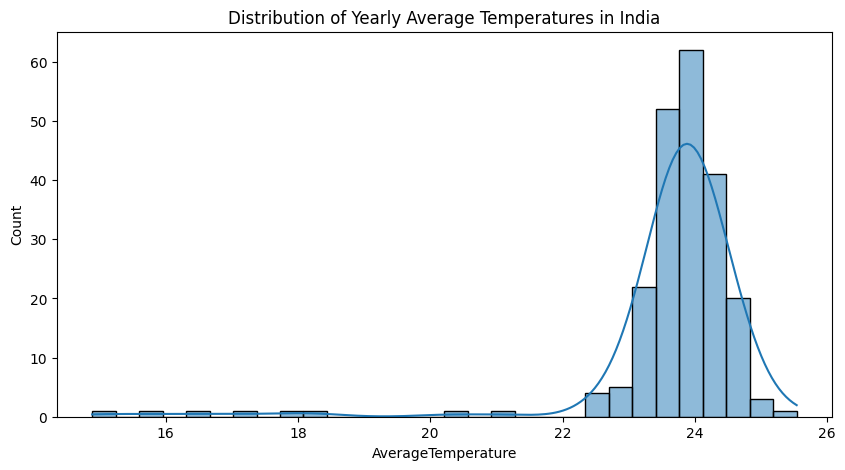

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df_india_yearly, bins=30, kde=True)
plt.title('Distribution of Yearly Average Temperatures in India')
plt.show()

In [7]:
df_india_reset = df_india_yearly.reset_index()
df_india_reset['Year'] = df_india_reset['dt'].dt.year
df_india_final = df_india_reset.drop(columns='dt')

In [11]:
from sklearn.model_selection import train_test_split
X = df_india_final[['Year']]
y = df_india_final['AverageTemperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 3.152616188840813


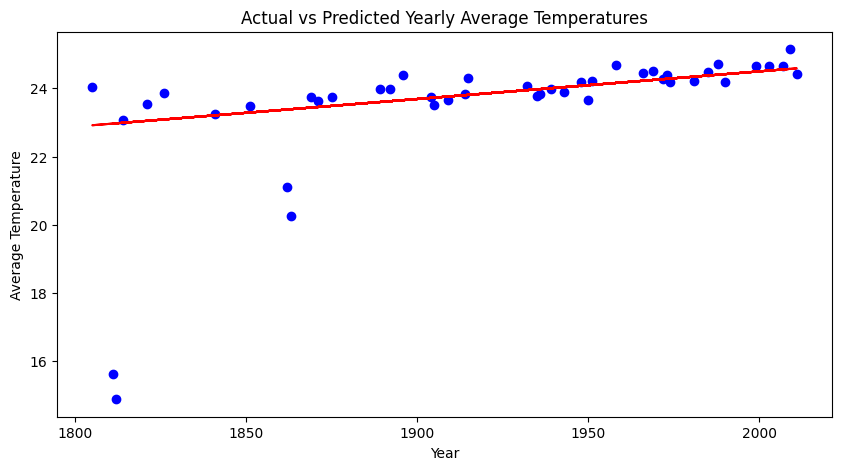

In [14]:
# Plotting actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color ='b') # Actual values
plt.plot(X_test, predictions, color ='r') # Predicted values
plt.title('Actual vs Predicted Yearly Average Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 0.7050871535965203
RMSE: 1.7755608096713593
R^2: 0.1983278299557052
